<a href="https://colab.research.google.com/github/LaXnZ/enhancing-sbmm-in-competitive-games/blob/cross-validation/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cross-Validation Results (5-Fold):
Average Accuracy: 0.86
Average Precision: 0.87
Average Recall: 0.84
Average F1: 0.86


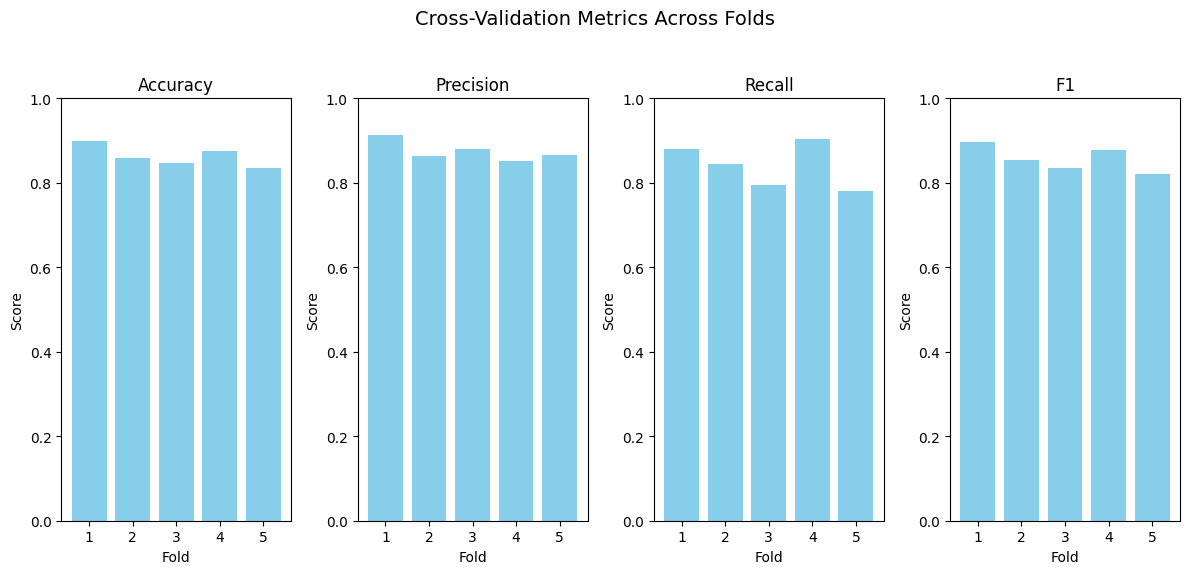

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load training and validation datasets
train_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/training_data.csv'
val_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/validation_data.csv'

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)

# Combine training and validation sets
combined_df = pd.concat([train_df, val_df], ignore_index=True)

# Separate features and target
X = combined_df.drop(columns=['Target'])
y = combined_df['Target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model
model = LogisticRegression()

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Apply 5-fold cross-validation
cv_results = cross_validate(model, X_scaled, y, cv=5, scoring=scoring, return_train_score=False)

# Print cross-validation scores
print("Cross-Validation Results (5-Fold):")
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f'test_{metric}'])
    print(f"Average {metric.capitalize()}: {mean_score:.2f}")

# Visualization
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = range(1, 6)

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 4, i + 1)
    plt.bar(folds, cv_results[f'test_{metric}'], color='skyblue')
    plt.ylim(0, 1)
    plt.title(f'{metric.capitalize()}')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.xticks(folds)

plt.suptitle('Cross-Validation Metrics Across Folds', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()